In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html


In [85]:
import tarfile
import numpy as np
import pickle
import os
import cv2

In [86]:
file_path = '/kaggle/input/cifar10-python/cifar-10-python.tar.gz' 
extracted_path = '/kaggle/working/cifar-10-batches-py'

In [87]:
# Extraction du fichier tar.gz 
with tarfile.open(file_path, 'r:gz') as tar: tar.extractall(path='/kaggle/working')

In [88]:
def load_cifar_batch(batch_filename): 
    with open(batch_filename, 'rb') as file: 
        batch = pickle.load(file, encoding='latin1') 
    data = batch['data'] 
    labels = batch['labels']
    return data,labels

In [89]:
# exemple
data,labels=load_cifar_batch("/kaggle/working/cifar-10-batches-py/data_batch_2")
data[0]

array([ 35,  27,  25, ..., 169, 168, 168], dtype=uint8)

In [90]:
data[0].shape
# # Pour les données CIFAR-10, chaque image est initialement stockée sous forme aplatie en 
# une seule dimension, et toutes les images sont concaténées ensemble dans un tableau 2D 
# de forme (nombre_d_images, 3072)

(3072,)

In [91]:
def redimensionner_et_gray(data, labels):
    # Redimensionnement et transposition des données
    data = data.reshape((-1, 3, 32, 32))  # Reshape en (nombre_d_images, canaux, hauteur, largeur)
    data = data.transpose(0, 2, 3, 1)     # Transposition en (nombre_d_images, hauteur, largeur, canaux)

    # Conversion des images en niveaux de gris et aplatissement en 1D
    data_gray_1D = []
    for img in data:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Conversion en niveaux de gris
        gray_1D = gray.flatten()  # Aplatissement en 1D
        data_gray_1D.append(gray_1D)

    return np.array(data_gray_1D), labels

In [92]:
import matplotlib.pyplot as plt

def show_examples(data, labels):
    plt.figure(figsize=(6, 6))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        gray_image = data[i].reshape(32, 32)  # Remodeler les images en 32x32 pour l'affichage car on utilise flatten 
        plt.imshow(gray_image, cmap='gray', interpolation='nearest')
        plt.title(labels[i])
        plt.axis('off') 
    plt.tight_layout()
    plt.show()

            

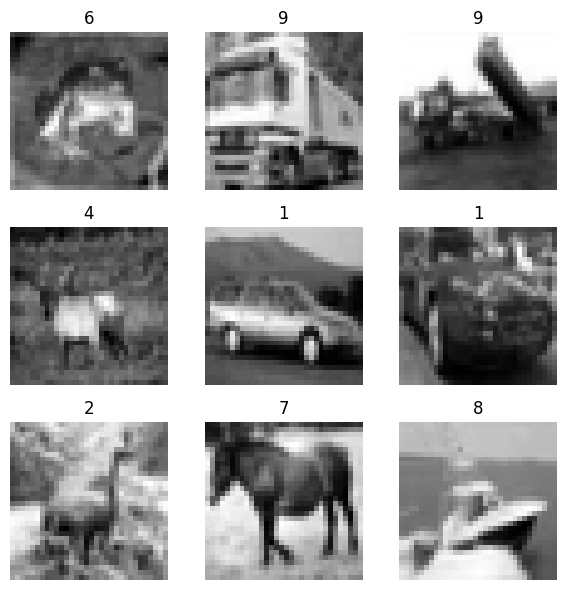

In [93]:
data,labels=load_cifar_batch("/kaggle/working/cifar-10-batches-py/data_batch_1")
data,labels=redimensionner_et_gray(data,labels)
show_examples(data,labels)



In [94]:
data.shape

(10000, 1024)

In [95]:
sett=set(labels)

In [96]:
sett

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [97]:
#dans chaque batch afficher pour chaque classe nmbr de image pour chaque label
def countt(data, labels):
    l = [0 for _ in range(10)]  # Initialisation de la liste de compteurs pour les 10 classes
    for label in labels:
        l[label] += 1
    return l


In [98]:
countt(data, labels)

[1005, 974, 1032, 1016, 999, 937, 1030, 1001, 1025, 981]

**pour mon modéle je vais utiliser 2 batch**

In [99]:

# Charger les batches de données
batch1 = "/kaggle/working/cifar-10-batches-py/data_batch_1"
batch2 = "/kaggle/working/cifar-10-batches-py/data_batch_2"
batch3 = "/kaggle/working/cifar-10-batches-py/data_batch_3"
batch4 = "/kaggle/working/cifar-10-batches-py/data_batch_4"


data1, labels1 = load_cifar_batch(batch1)
data2, labels2 = load_cifar_batch(batch2)
data3, labels3 = load_cifar_batch(batch3)
data4, labels4 = load_cifar_batch(batch4)

# Redimensionner et convertir les données en niveaux de gris 1D
data1, labels1 = redimensionner_et_gray(data1, labels1)
data2, labels2 = redimensionner_et_gray(data2, labels2)
data3, labels3 = redimensionner_et_gray(data3, labels3)
data4, labels4 = redimensionner_et_gray(data4, labels4)

# Vérifier l'équilibre des labels dans les données
print("Nombre d'images dans le batch 1 pour chaque label:", countt(data1, labels1))
print("Nombre d'images dans le batch 2 pour chaque label:", countt(data2, labels2))
print("Nombre d'images dans le batch 3 pour chaque label:", countt(data3, labels3))
print("Nombre d'images dans le batch 4 pour chaque label:", countt(data4, labels4))



Nombre d'images dans le batch 1 pour chaque label: [1005, 974, 1032, 1016, 999, 937, 1030, 1001, 1025, 981]
Nombre d'images dans le batch 2 pour chaque label: [984, 1007, 1010, 995, 1010, 988, 1008, 1026, 987, 985]
Nombre d'images dans le batch 3 pour chaque label: [994, 1042, 965, 997, 990, 1029, 978, 1015, 961, 1029]
Nombre d'images dans le batch 4 pour chaque label: [1003, 963, 1041, 976, 1004, 1021, 1004, 981, 1024, 983]


**Voir les images pour chaque label**

In [100]:
def show_one_image_per_label(data, labels):
    plt.figure(figsize=(10, 10)) 
    displayed_labels = [False] * 10 # Suivi des labels déjà affichés
    count = 0 
    for i in range(len(labels)):
        label = labels[i]
        if not displayed_labels[label]: # Vérifier si l'image de ce label a déjà été affichée 
            plt.subplot(3, 3, count + 1) 
            plt.imshow(data[i].reshape(32,32), interpolation='nearest',cmap='gray') 
            print(label)
            plt.axis('off')
            displayed_labels[label] = True 
            count += 1 
        if count == 9: # Arrêter après avoir affiché 9 images
            break 
        plt.tight_layout() 
        plt.show()

1


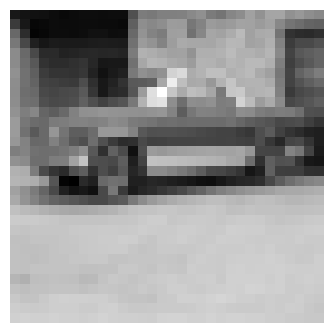

6


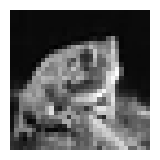

<Figure size 640x480 with 0 Axes>

8


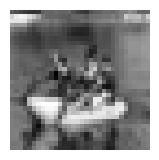

<Figure size 640x480 with 0 Axes>

3


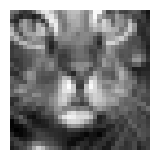

4


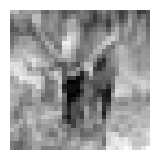

<Figure size 640x480 with 0 Axes>

0


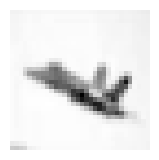

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

5


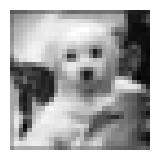

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

2


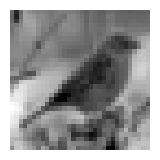

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

7


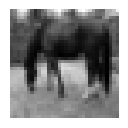

In [101]:
show_one_image_per_label(data2, labels2)

In [102]:
class_names = ['avion', 'automobile', 'oiseau', 'chat', 'cerf', 'chien', 'grenouille', 'cheval', 'bateau', 'camion']

In [103]:
print("Valeurs avant normalisation (exemple):", data1[0][:10]) # Affiche les 10 premières valeurs de la première image
print("min",data1[0].min())
print("max",data1[0].max())

Valeurs avant normalisation (exemple): [ 62  45  47  52  70  86 101 105 112 115]
min 0
max 247


In [104]:
# Fonction pour normaliser une image
def normaliser(data): 
    # Normaliser les images
    data = np.array([img/255.0 for img in data])
    return data

In [105]:
# Normaliser toutes les images dans data1 et data2
data2=normaliser(data2)
data1=normaliser(data1)
data3=normaliser(data3)
data4=normaliser(data4)


In [106]:
data1[0]
print("min",data1[0].min())
print("max",data1[0].max())

min 0.0
max 0.9686274509803922


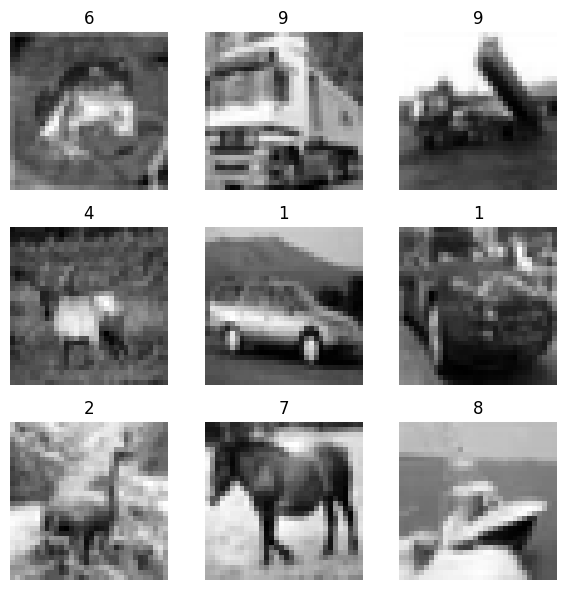

In [107]:
show_examples(data1,labels1)

**Model**

In [108]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping


In [110]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2

# Définir le modèle CNN
input_img = Input(shape=(32, 32, 1))  # Note: Les images sont en niveaux de gris

# Couches de convolution et de pooling
x = Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Flatten()(x)

# Couches entièrement connectées avec Dropout
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x) 
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.25)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)  # 10 classes pour CIFAR-10

# Définir et compiler le modèle
model = Model(inputs=input_img, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [112]:
from sklearn.model_selection import train_test_split
import numpy as np

# Concaténer les quatre ensembles de données
data = np.concatenate((data1, data2, data3, data4), axis=0)

# Concaténer les étiquettes correspondantes
labels = np.concatenate((labels1, labels2, labels3, labels4), axis=0)

print(f'Taille des données combinées: {data.shape}')
print(f'Taille des étiquettes combinées: {labels.shape}')

# Adapter les dimensions des données pour correspondre aux entrées du modèle 
data = data.reshape(data.shape[0], 32, 32, 1) # Diviser les données en ensembles d'entraînement et de validation 
data_train, data_val, labels_train, labels_val = train_test_split( data, labels, test_size=0.2, random_state=42)

Taille des données combinées: (40000, 1024)
Taille des étiquettes combinées: (40000,)


In [113]:
# Ajout des callbacks Early Stopping et Model Checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
checkpoint_filepath = '/kaggle/working/.{epoch:02d}-{val_loss:.2f}.keras'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [117]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data Augmentation
datagen = ImageDataGenerator( rotation_range=20, 
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             zoom_range=0.2 )

In [118]:
# Adapter les données d'entraînement 
datagen.fit(data_train)

In [119]:

# Entraîner le modèle en utilisant le générateur de données 
history = model.fit(datagen.flow(data_train, labels_train, batch_size=32),
                    validation_data=(data_val, labels_val),
                    epochs=150,
                    callbacks=[early_stopping])

Epoch 1/150


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.1624 - loss: 3.8969 - val_accuracy: 0.3215 - val_loss: 2.6032
Epoch 2/150
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.2858 - loss: 2.6238 - val_accuracy: 0.2046 - val_loss: 3.3916
Epoch 3/150
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.3595 - loss: 2.2917 - val_accuracy: 0.3264 - val_loss: 2.7402
Epoch 4/150
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.4042 - loss: 2.1862 - val_accuracy: 0.4586 - val_loss: 2.0406
Epoch 5/150
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.4507 - loss: 2.1325 - val_accuracy: 0.4956 - val_loss: 2.0340
Epoch 6/150
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.4806 - loss: 2.0991 - val_accuracy: 0.4011 - val_loss: 2.6840
Epoch 7/150
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.5008 - loss: 2.0644 - val_accuracy: 0.5879 - val_loss: 1.7780
Epoch 8/150
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.5171 - los

In [120]:
# Évaluer le modèle
loss, accuracy = model.evaluate(data_val, labels_val)
print(f'Loss: {loss}, Accuracy: {accuracy}')

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6729 - loss: 1.3840
Loss: 1.3892972469329834, Accuracy: 0.6763749718666077


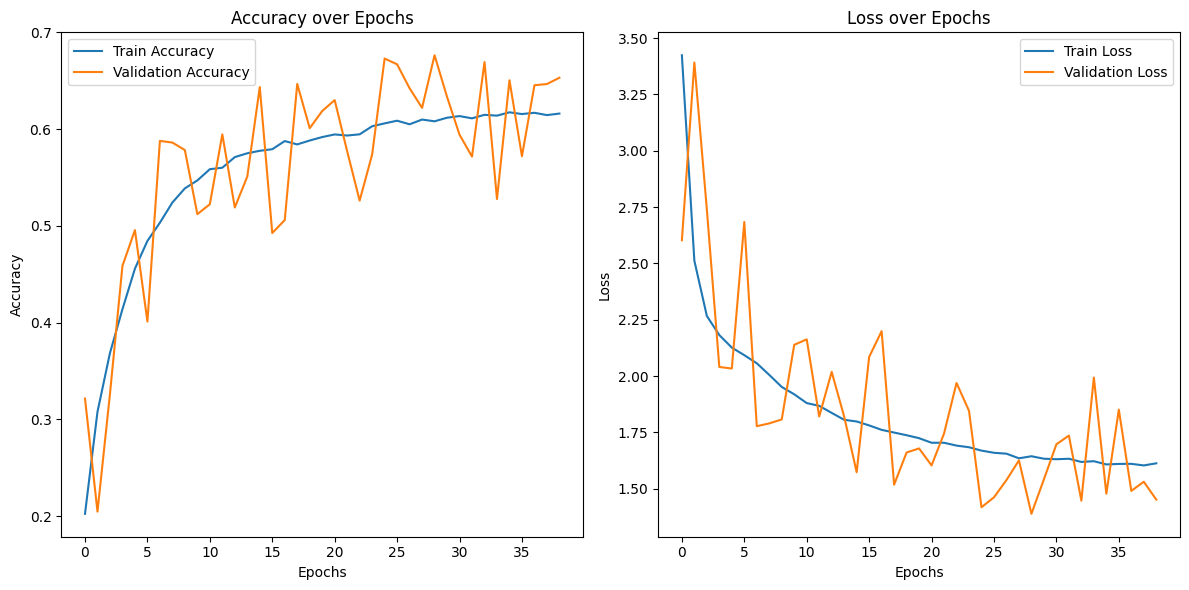

In [121]:
import matplotlib.pyplot as plt

# Fonction pour tracer les graphes de précision et de perte
def plot_accuracy_loss(history):
    # Tracer la précision d'entraînement et de validation
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Tracer la perte d'entraînement et de validation
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Appeler la fonction pour afficher les graphes
plot_accuracy_loss(history)


**faire meme etapes pour test images**

In [122]:
test_batch="/kaggle/working/cifar-10-batches-py/test_batch"

In [123]:
# Charger les batches de données de test
data_test, label_test = load_cifar_batch(test_batch)

# Redimensionner et convertir les données en niveaux de gris 1D
data_test, label_test = redimensionner_et_gray(data_test, label_test)

# Normaliser les données de test
data_test = normaliser(data_test)  # Assurez-vous de normaliser data_test

# Redimensionner les données de test pour correspondre à l'entrée du modèle
data_test = data_test.reshape(data_test.shape[0], 32, 32, 1)

# Assurez-vous que les étiquettes de test sont de type int
label_test = np.array(label_test, dtype='int')

# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(data_test, label_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6717 - loss: 1.4070
Test Loss: 1.4056476354599, Test Accuracy: 0.6711000204086304


In [124]:
# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(data_test,label_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6717 - loss: 1.4070
Test Loss: 1.4056476354599, Test Accuracy: 0.6711000204086304


**Tester sur une image**

In [125]:
d, l = load_cifar_batch("/kaggle/working/cifar-10-batches-py/data_batch_3")

In [155]:
# Charger les données et les étiquettes du lot
data_batch_3, labels_batch_3 = load_cifar_batch("/kaggle/working/cifar-10-batches-py/data_batch_3")

# Choisir une image et l'étiquette associée
test_index =250 # Vous pouvez changer cet index pour tester une autre image
test_image = data_batch_3[test_index]
test_label = labels_batch_3[test_index]

# Redimensionner et normaliser l'image
test_image = test_image.reshape(32, 32, 3)  # Reshape pour 32x32x3 (canaux RGB)
test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)  # Convertir en niveaux de gris
test_image = cv2.resize(test_image, (32, 32))  # Assurez-vous que la taille est correcte
test_image = test_image.astype('float32') / 255.0  # Normaliser l'image
test_image = test_image.reshape(1, 32, 32, 1)  # Reshape pour correspondre à l'entrée du modèle

# Assurez-vous que l'étiquette est un entier
test_label = np.array(test_label, dtype='int')


In [156]:
# Faire une prédiction sur l'image de test
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

# Afficher les résultats
class_names = ['avion', 'automobile', 'oiseau', 'chat', 'cerf', 'chien', 'grenouille', 'cheval', 'bateau', 'camion']
print(f'Predicted class: {class_names[predicted_class]}')
print(f'Actual class: {class_names[test_label]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: camion
Actual class: camion


In [152]:
import numpy as np
from sklearn.metrics import classification_report

# Assurez-vous que data_test et label_test sont bien définis et prétraités
# Exemple pour charger et prétraiter les données de test si nécessaire
data_test, label_test = load_cifar_batch("/kaggle/working/cifar-10-batches-py/test_batch")
data_test, label_test = redimensionner_et_gray(data_test, label_test)
data_test = normaliser(data_test)
data_test = data_test.reshape(data_test.shape[0], 32, 32, 1)
label_test = np.array(label_test, dtype='int')

# Faire des prédictions sur les données de test
y_pred = model.predict(data_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir les probabilités en classes prédictes

# Générer le rapport de classification
class_names = ['avion', 'automobile', 'oiseau', 'chat', 'cerf', 'chien', 'grenouille', 'cheval', 'bateau', 'camion']
report = classification_report(label_test, y_pred_classes, target_names=class_names)
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

       avion       0.76      0.68      0.72      1000
  automobile       0.75      0.86      0.80      1000
      oiseau       0.74      0.35      0.48      1000
        chat       0.48      0.46      0.47      1000
        cerf       0.66      0.54      0.59      1000
       chien       0.69      0.54      0.60      1000
  grenouille       0.59      0.82      0.69      1000
      cheval       0.62      0.82      0.71      1000
      bateau       0.83      0.79      0.81      1000
      camion       0.66      0.85      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.66     10000
weighted avg       0.68      0.67      0.66     10000

